In [47]:
# https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

# save the final model to file
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import pandas as pd
import io
from PIL import Image
import numpy as np
 

# load train and test dataset
def load_dataset():
	# load dataset
	train_df = pd.read_parquet("../datasets/FashionMNIST/train.parquet")
	test_df = pd.read_parquet("../datasets/FashionMNIST/test.parquet")

	trainX = []
	trainY = []

	for i in range(train_df.shape[0]):
		image = Image.open(io.BytesIO(train_df["image"].iloc[i]['bytes']))
		img_array = np.array(image)
		trainX.append(img_array)
		trainY.append(train_df["label"].iloc[i])
		
	trainX = np.array(trainX)
	trainY = np.array(trainY)

	testX = []
	testY = []

	for i in range(test_df.shape[0]):
		image = Image.open(io.BytesIO(test_df["image"].iloc[i]['bytes']))
		img_array = np.array(image)
		testX.append(img_array)
		testY.append(test_df["label"].iloc[i])

	testX = np.array(testX)
	testY = np.array(testY)

	# (trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2)
	# save model
	model.save('final_model.h5')
 
# entry point, run the test harness
run_test_harness()

Epoch 1/10
1875/1875 - 48s - 26ms/step - accuracy: 0.8238 - loss: 0.4813
Epoch 2/10
1875/1875 - 51s - 27ms/step - accuracy: 0.8839 - loss: 0.3147
Epoch 3/10
1875/1875 - 51s - 27ms/step - accuracy: 0.8997 - loss: 0.2711
Epoch 4/10
1875/1875 - 49s - 26ms/step - accuracy: 0.9083 - loss: 0.2443
Epoch 5/10
1875/1875 - 52s - 28ms/step - accuracy: 0.9169 - loss: 0.2220
Epoch 6/10
1875/1875 - 49s - 26ms/step - accuracy: 0.9234 - loss: 0.2051
Epoch 7/10
1875/1875 - 53s - 28ms/step - accuracy: 0.9275 - loss: 0.1907
Epoch 8/10
1875/1875 - 50s - 26ms/step - accuracy: 0.9330 - loss: 0.1776
Epoch 9/10
1875/1875 - 52s - 28ms/step - accuracy: 0.9384 - loss: 0.1642
Epoch 10/10
1875/1875 - 50s - 27ms/step - accuracy: 0.9429 - loss: 0.1504


In [48]:

# evaluate the deep model on the test dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
 
# load train and test dataset
def load_dataset():
	# load dataset

	train_df = pd.read_parquet("../datasets/FashionMNIST/train.parquet")
	test_df = pd.read_parquet("../datasets/FashionMNIST/test.parquet")

	trainX = []
	trainY = []

	for i in range(train_df.shape[0]):
		image = Image.open(io.BytesIO(train_df["image"].iloc[i]['bytes']))
		img_array = np.array(image)
		trainX.append(img_array)
		trainY.append(train_df["label"].iloc[i])
		
	trainX = np.array(trainX)
	trainY = np.array(trainY)

	testX = []
	testY = []

	for i in range(test_df.shape[0]):
		image = Image.open(io.BytesIO(test_df["image"].iloc[i]['bytes']))
		img_array = np.array(image)
		testX.append(img_array)
		testY.append(test_df["label"].iloc[i])

	testX = np.array(testX)
	testY = np.array(testY)

	# (trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# load model
	model = load_model('final_model.h5')
	# evaluate model on test dataset
	_, acc = model.evaluate(testX, testY, verbose=1)
	print('> %.3f' % (acc * 100.0))
 
# entry point, run the test harness
run_test_harness()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8943 - loss: 0.3151
> 89.830


In [8]:
# make a prediction for a new image.
from numpy import argmax
from keras.models import load_model
from PIL import Image
import pandas as pd
import io
import numpy as np
 
# load an image and predict the class
def run_example():
    test = pd.read_parquet("datasets/MNIST/test.parquet")
    image = Image.open(io.BytesIO(test["image"].iloc[100]['bytes']))
    img = np.array(image)
    img = img.reshape(1, 28, 28, 1)

    # load model
    model = load_model('final_model.h5')
    # predict the class
    predict_value = model.predict(img)
    digit = argmax(predict_value)
    print(digit)
 
# entry point, run the example
run_example()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
6


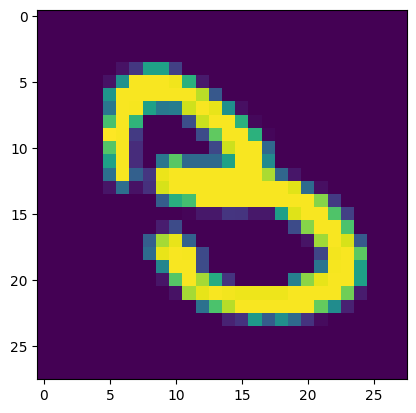

In [26]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import io

%matplotlib inline
test = pd.read_parquet("../datasets/MNIST/test.parquet")
image = Image.open(io.BytesIO(test["image"].iloc[18]['bytes']))
plt.imshow(image)

In [9]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix

import numpy as np

model = load_model('../Out/initial_cnn_model_mnist.h5')
X = np.load('../Out/testdata.npz')
Y = np.load('../Out/testlabels.npz')
testX = X['data']
testY = Y['data']
# reshape dataset to have a single channel
testX = testX.reshape((testX.shape[0], 28, 28, 1))

y_pred = model.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(testY, y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


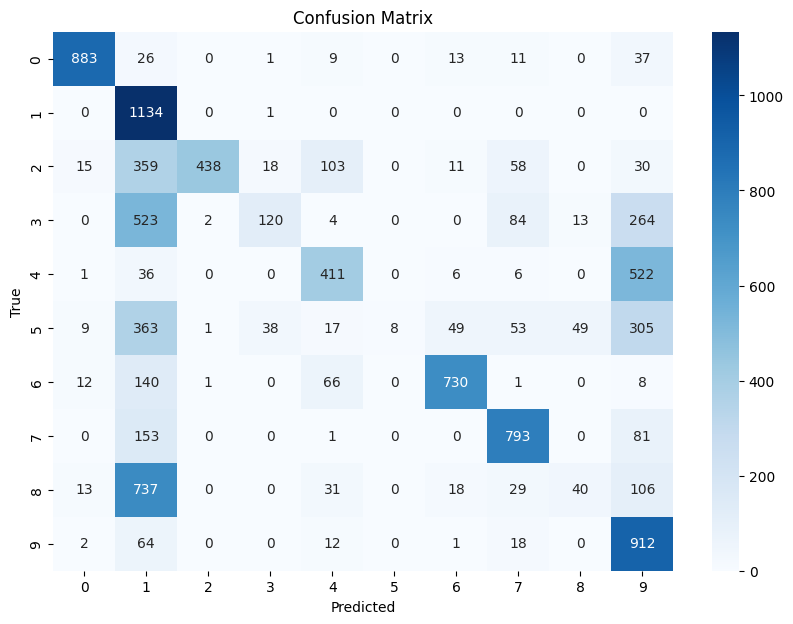

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Step 1: Create a boolean mask for mispredictions
mispredictions_mask = testY != y_pred_classes

# Step 2: Get the indices of mispredictions
misprediction_indices = np.where(mispredictions_mask)[0]

# Print the results
print(misprediction_indices)
print(1-len(misprediction_indices)/len(testY))

[   1    8   15 ... 9993 9997 9998]
0.5468999999999999


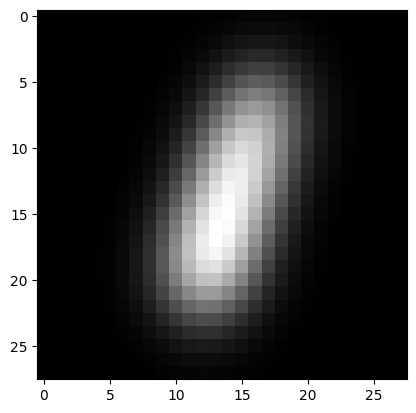

In [12]:
plt.imshow(testX[2], cmap='gray')

In [123]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init

def _weights_init(m):
    classname = m.__class__.__name__
    #print(classname)
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        init.kaiming_normal_(m.weight)

class LambdaLayer(nn.Module):
    def __init__(self, lambd):
        super(LambdaLayer, self).__init__()
        self.lambd = lambd

    def forward(self, x):
        return self.lambd(x)

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, option='A'):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            if option == 'A':
                """
                For CIFAR10 ResNet paper uses option A.
                """
                self.shortcut = LambdaLayer(lambda x:
                                            F.pad(x[:, :, ::2, ::2], (0, 0, 0, 0, planes//4, planes//4), "constant", 0))
            elif option == 'B':
                self.shortcut = nn.Sequential(
                     nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                     nn.BatchNorm2d(self.expansion * planes)
                )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 16

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self._make_layer(block, 16, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 64, num_blocks[2], stride=2)
        self.linear = nn.Linear(64, num_classes)

        self.apply(_weights_init)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion

        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, out.size()[3])
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

def resnet56():
    return ResNet(BasicBlock, [9, 9, 9])

state_dict = torch.load('../models/resnet56.th', map_location=torch.device('cpu'))
state_dict = {key.replace('module.', ''): value for key, value in state_dict['state_dict'].items()}
model = resnet56()
model.load_state_dict(state_dict)
# print(model)

<All keys matched successfully>

In [159]:
# import numpy as np
# import matplotlib.pyplot as plt

# def unpickle():
#     import pickle
#     with open('../datasets/cifar10/test_batch', 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict

# cifar_test = unpickle()
# print(cifar_test.keys())

# images = cifar_test[b'data']
# labels = cifar_test[b'labels']
# print(labels)

import torchvision
import torchvision.transforms as transforms

# Define transformations to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Grayscale(num_output_channels=3),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the testing dataset
testset = torchvision.datasets.CIFAR10(root='../datasets/cifar10/', train=False, download=False, transform=transform)

In [160]:
testset[0][0].shape

torch.Size([3, 32, 32])

In [171]:
predictions = []
labels = []
model.eval()

for image in testset:
    labels.append(image[1])
    image = image[0].unsqueeze(0)

    output = model(image)
    predictions.append(torch.argmax(output))
    if len(predictions) == 100:
        break


In [172]:
sum = 0

for i in range(len(predictions)):
    if predictions[i].item() == labels[i]:
        sum += 1

print(sum/2000)
print(predictions)
print(labels)

0.0445
[tensor(3), tensor(8), tensor(8), tensor(0), tensor(1), tensor(6), tensor(1), tensor(6), tensor(3), tensor(1), tensor(0), tensor(9), tensor(5), tensor(7), tensor(9), tensor(8), tensor(5), tensor(7), tensor(8), tensor(6), tensor(7), tensor(0), tensor(4), tensor(9), tensor(3), tensor(3), tensor(4), tensor(0), tensor(9), tensor(6), tensor(6), tensor(5), tensor(4), tensor(5), tensor(9), tensor(2), tensor(4), tensor(1), tensor(9), tensor(5), tensor(4), tensor(6), tensor(5), tensor(6), tensor(0), tensor(9), tensor(3), tensor(8), tensor(7), tensor(6), tensor(9), tensor(8), tensor(2), tensor(3), tensor(8), tensor(8), tensor(7), tensor(7), tensor(5), tensor(3), tensor(7), tensor(5), tensor(6), tensor(1), tensor(6), tensor(2), tensor(1), tensor(2), tensor(3), tensor(7), tensor(2), tensor(6), tensor(8), tensor(8), tensor(0), tensor(2), tensor(9), tensor(3), tensor(3), tensor(8), tensor(8), tensor(1), tensor(1), tensor(7), tensor(2), tensor(3), tensor(3), tensor(7), tensor(8), tensor(9), te

(32, 32, 1)


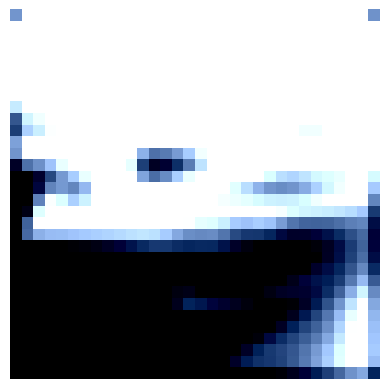

tensor([[ 1.6002,  3.8641, -3.4865,  3.9155, -0.5317, -2.3711, -4.5910, -1.8420,
          5.9055, -2.5080]], grad_fn=<AddmmBackward0>)

In [ ]:
X = np.load('../Out/testdata.npz')
Y = np.load('../Out/testlabels.npz')
testX = X['data']
testY = Y['data']
testX = testX.reshape((testX.shape[0], 32, 32, 1))

transform = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

img = testX[0]
print(img.shape)

img = torch.tensor(img).permute(2, 0, 1).repeat(3, 1, 1)

img = transform(img)

plt.imshow(img.permute(1, 2, 0))
plt.axis('off')  # Hide axes
plt.show()

img = img.unsqueeze(0)

output = model(img)
output
